In [7]:
import sys
import os

# Add project root to path
sys.path.append(os.path.abspath(".."))

In [9]:
from src.propensity import train_propensity_model, compute_propensity_scores
import pandas as pd

df = pd.read_csv("../data/simulated_campaign_data.csv")

model, auc = train_propensity_model(df)
df = compute_propensity_scores(model, df)

print("Propensity Model AUC:", auc)

Propensity Model AUC: 0.6877322392285234


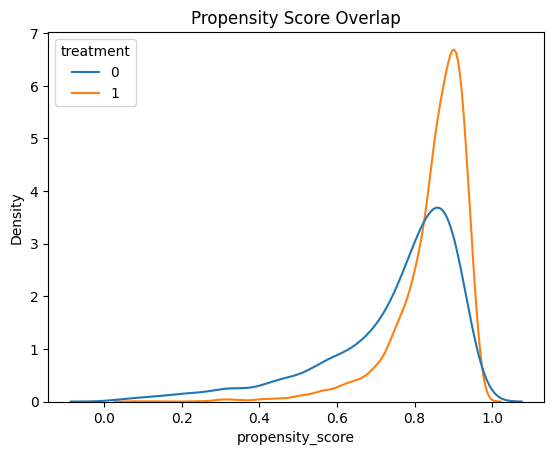

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df, x="propensity_score", hue="treatment", common_norm=False)
plt.title("Propensity Score Overlap")
plt.show()

## Why Propensity Modeling Is Necessary

In this dataset, treatment assignment is not random.  
Certain customer characteristics influence whether a customer receives the intervention.

Therefore, the naive comparison:

\[
E[Y \mid T=1] - E[Y \mid T=0]
\]

does **not** estimate the causal effect because:

\[
T \not\!\perp\!\!\!\perp X
\]

Treatment depends on observed covariates \( X \).  
This introduces selection bias.

To address this, we estimate the **propensity score**:

\[
e(x) = P(T=1 \mid X=x)
\]

The propensity score compresses multivariate confounding into a single scalar that represents the probability of treatment given observed features.

---

## Overlap Assumption (Positivity)

For valid causal inference, we require:

\[
0 < e(x) < 1
\]

for all feature profiles \( x \).

This is the **overlap assumption** (also called positivity).  

If some customers always receive treatment or never receive treatment, their counterfactual outcome cannot be inferred.  
Causal effect estimation requires overlap between treated and untreated groups.

The density plot of propensity scores helps diagnose whether this assumption approximately holds.

- Strong overlap → causal estimation is feasible  
- Extreme separation → weak identifiability  

---

## Conceptual Role of Propensity Scores

Propensity modeling attempts to:

- Balance observed covariates between treatment groups  
- Approximate a randomized experiment  
- Reduce bias due to observable confounding  

Under the assumption of **conditional exchangeability**:

\[
(Y(0), Y(1)) \perp T \mid X
\]

conditioning on propensity can help make treatment assignment independent of potential outcomes.

However, propensity modeling does **not** remove hidden confounding.  
If an unobserved variable influences both treatment and outcome, bias may persist.

---

## Interpretation of Propensity Model AUC

The AUC of the propensity model reflects how predictable treatment assignment is from observed features.

- AUC ≈ 0.5 → near-random assignment  
- Moderate AUC → partial confounding  
- High AUC → strong selection bias  

If treatment is highly predictable, the dataset deviates significantly from a randomized experiment.

---

## Transition to Uplift Modeling

Propensity scores prepare the dataset for causal modeling techniques such as:

- T-Learner  
- X-Learner  
- Doubly Robust approaches  

These methods explicitly estimate **heterogeneous treatment effects**, allowing targeting decisions to be optimized for incremental profit rather than predicted outcome probability.